In [1]:
#Importando las librerias

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

In [2]:
#Obteniendo la data de sklearn
data = datasets.fetch_openml(
    "mnist_784",
    version = 1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [3]:
pixel_values #Muestras

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
targets #Numeros de cada muestra

array([5, 0, 4, ..., 4, 5, 6])

In [5]:
pixel_values.shape

(70000, 784)

In [6]:
pixel_values[0,:] #viendo la primer fila

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

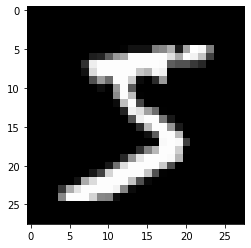

In [7]:
#Visualizando las muestras
single_image = pixel_values[0,:].reshape(28,28) #convirtiendo la primer fila a un arreglo de 28x28
plt.imshow(single_image, cmap='gray')

In [8]:
def numbers(single_image):
    #Single es equivalente a una fila de 728 columnas
    reshape = single_image.reshape(28,28)
    return plt.imshow(reshape, cmap='gray')

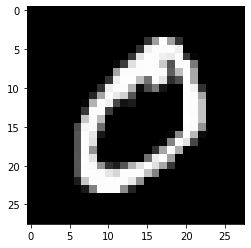

In [9]:
numbers(pixel_values[1,:])

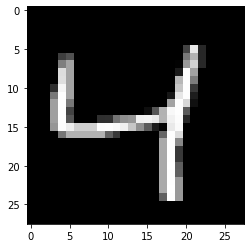

In [10]:
numbers(pixel_values[2,:])

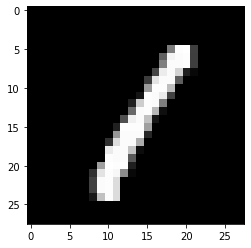

In [11]:
numbers(pixel_values[3,:])

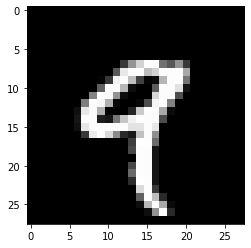

In [12]:
numbers(pixel_values[4,:])

In [13]:
#Creando la transformación T-SNE, utilizaremos solo dos componentes ya que las imagenes se pueden ver en 2 dimensiones.
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

In [14]:
transformed_data[:10] #obtenemos 2 columnas y 3000 filas de la transformación t-sne

array([[ -5.281551  , -28.952768  ],
       [-26.105896  , -68.06932   ],
       [-42.503582  ,  35.58039   ],
       [ 38.893967  ,  26.663395  ],
       [-14.770573  ,  35.433247  ],
       [ 63.99723   ,  -1.1023259 ],
       [ -6.5517006 ,   9.9436    ],
       [ 20.086042  , -44.003902  ],
       [ -0.80624753,  12.682267  ],
       [ -1.4811943 ,  45.506077  ]], dtype=float32)

In [15]:
#Convirtiendo los datos transformados en un dataframe de pandas.
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])), #unimos los datos transformados con la columna targets
    columns=["x", "y", "targets"] #nombramos las columnas de nuestro dataframe
) 
tsne_df['targets'] = tsne_df.targets.astype(int)

In [16]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


In [17]:
tsne_df[['x','y']].loc[0]

x    -5.281551
y   -28.952768
Name: 0, dtype: float64

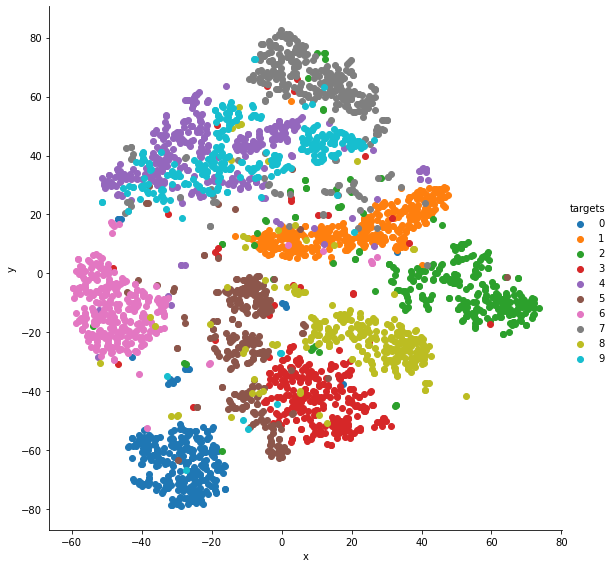

In [18]:
#visualizando con seaborn y matplotlib el nuevo dataframe
grid = sns.FacetGrid(tsne_df, hue='targets', height=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

In [19]:
#Utilizando PCA en lugar de T-SNE
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pixel_values[:3000,:])
principal_components[:10]

array([[ 163.26531912,  346.3616784 ],
       [1077.73039694,  389.6445448 ],
       [ -75.70647569, -417.02798135],
       [-909.50691726,  617.90547982],
       [-344.79982652, -716.44055686],
       [ 193.23557687, -171.67290628],
       [-686.38184952,  110.59500604],
       [ 531.09041228,  389.37047871],
       [-833.57774004,   14.76515434],
       [-234.20231409, -462.68410751]])

In [21]:
#Convirtiendo los datos transformados en un dataframe de pandas.
pca_df = pd.DataFrame(
    np.column_stack((principal_components, targets[:3000])), #unimos los datos transformados con la columna targets
    columns=["x", "y", "targets"] #nombramos las columnas de nuestro dataframe
) 
pca_df['targets'] = pca_df.targets.astype(int)

In [22]:
pca_df.head()

,x,y,targets
0,163.265319,346.361678,5
1,1077.730397,389.644545,0
2,-75.706476,-417.027981,4
3,-909.506917,617.905480,1
4,-344.799827,-716.440557,9


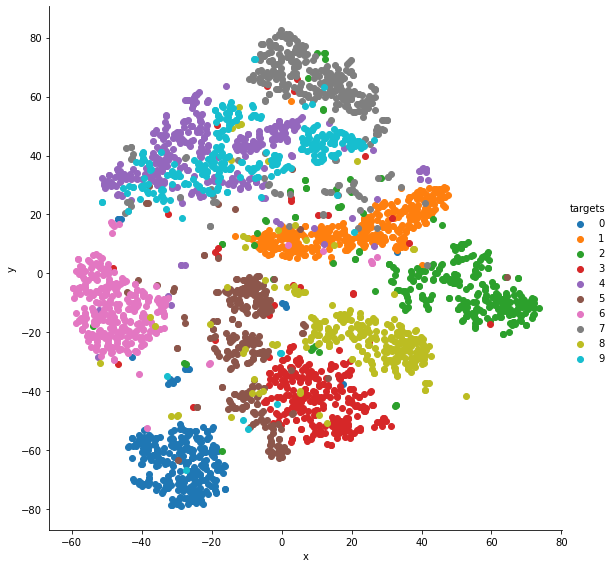

In [23]:
#visualizando con seaborn y matplotlib el nuevo dataframe
grid = sns.FacetGrid(tsne_df, hue='targets', height=8)
grid.map(plt.scatter, 'x', 'y').add_legend()

### Validación cruzada
La validación cruzada es un paso en el proceso de la construcción de modelos de machine learning que nos ayuda a estar seguros de que nuestro modelo se ajusto adecuadamente a los datos

Existe un conjunto de datos de la calidad de vinos rojos. Este conjunto de datos tiene 11 diferentes atributos que deciden la calidad del vino rojo. Estos atributos incluyen:

    • fixed acidity  
    • volatile acidity  
    • citric acid  
    • residual sugar  
    • chlorides  
    • free sulfur dioxide  
    • total sulfur dioxide  
    • density  
    • pH  
    • sulphates  
    • alcohol
    
Basandonos en estas variables, necesitamos predecir la calidad del vino rojo que es un valor que se mide entre 0 y 10.

In [24]:
#Cargando el dataset de vinos
df = pd.read_csv("../data/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
df.shape

(1599, 12)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [27]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Podemos resolver este problema de dos maneras, con clasificación o como regresión, ya que la calidad del vino esta representada por un número entre 0 y 10.

En este ejemplo utilizaremos una herramienta de clasificación.

In [28]:
#Creamos un diccionario que servira para establecer la calidad entre 0 y 5 para simplificar.
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

#Cambiamos la columna de calidad en nuestro dataset
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [29]:
df['quality'].unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [30]:
df.quality.head()

0    2
1    2
2    2
3    3
4    2
Name: quality, dtype: int64

Una vez que preparamos los datos podemos seleccionar nuestra herramienta de clasificación, existen muchas herramientas pero en esta ocasión utilizaremos **arboles de decisión**

Sabemos que nuestro conjunto de datos contiene 1599 datos, por lo que tendremos que separar algunos en data de entrenamiento y data de prueba para poder hacer validaciones cruzadas.

In [31]:
df.sample(frac=1).reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.580,0.28,3.2,0.066,21.0,114.0,0.99730,3.22,0.54,9.4,3
1,8.9,0.565,0.34,3.0,0.093,16.0,112.0,0.99980,3.38,0.61,9.5,2
2,8.7,0.700,0.24,2.5,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,3
3,7.7,0.570,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,3
4,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.9,0.350,0.21,1.9,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,2
1595,8.1,0.660,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,9.0,2
1596,9.9,0.740,0.19,5.8,0.111,33.0,76.0,0.99878,3.14,0.55,9.4,2
1597,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,3


In [32]:
df_train = df.head(1000)
df_test = df.tail(599)

Ahora entrenaremos nuestro arbol de decisión.

Así luce un arbol de decisión:

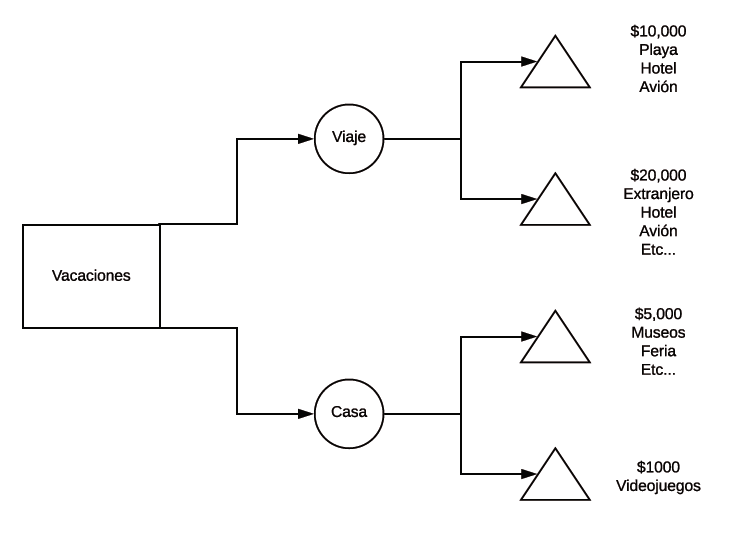

In [33]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth = 3)

In [34]:
columns = df_train.columns.to_list()[:-1] #obtenemos los nombres de las columnas excepto la de quality

In [35]:
#entrenamos el modelo
clf.fit(df_train[columns], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [36]:
#Revisemos la exactitud del modelo en los datos de entrenamiento.
train_predictions = clf.predict(df_train[columns])
test_predictions = clf.predict(df_test[columns])
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

In [37]:
#calculamos la exactitud de las predicciones en los datos de prueba
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [38]:
round(train_accuracy*100), round(test_accuracy*100)

(58.0, 54.0)

In [39]:
#incrementamos  la profundida a 7 arboles y re-entrenamos.
clf = tree.DecisionTreeClassifier(max_depth = 7)

columns = df_train.columns.to_list()[:-1] #obtenemos los nombres de las columnas excepto la de quality

#entrenamos el modelo
clf.fit(df_train[columns], df_train.quality)

#Revisemos la exactitud del modelo en los datos de entrenamiento.
train_predictions = clf.predict(df_train[columns])
test_predictions = clf.predict(df_test[columns])
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

#calculamos la exactitud de las predicciones en los datos de prueba
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

round(train_accuracy*100), round(test_accuracy*100)

(79.0, 50.0)

# Graficando diferentes pruebas de exactitud con diferentes niveles de profundidad

In [46]:
#Tamaño del texto de las etiquetas
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

#Creando listas para guardar las diferentes pruebas de exactitud.
train_accuracies = [0.5]
test_accuracies = [0.5]

#iterando sobre algunos valores
for depth in range(1, 25):
    #inicializa el modelo
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    #entrenando el modelo
    clf.fit(df_train[columns], df_train.quality)
    #creando predicciones en datos de entrenamiento y testeo
    train_predictions = clf.predict(df_train[columns])
    test_predictions = clf.predict(df_test[columns])
    #calculando los datos de entrenamiento y de testeo
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    #agregando las exactitudes calculadas a nuestras pruebas de exactitud
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

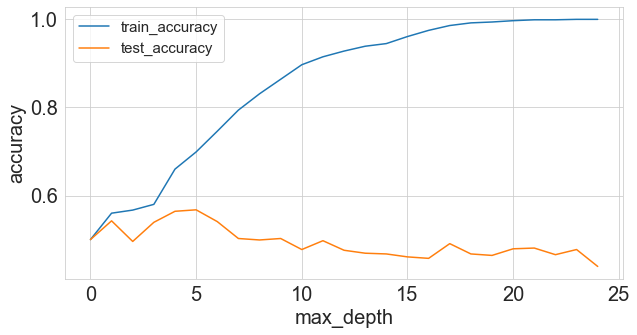

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.plot(train_accuracies, label="train_accuracy")
plt.plot(test_accuracies, label="test_accuracy")
plt.legend(loc="upper left", prop={"size":15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()
#Esto se llama overfitting, el modelo resulta ser perfecto con los datos de entrenamiento pero empeora con los de prueba

Text(0, 0.5, 'count')

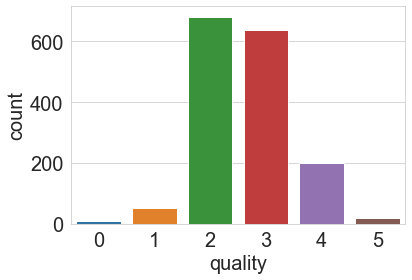

In [52]:
#Observamos que la calidad de los vinos esta sesgada
#La mayoría de los vinos estan entre 2 y 3
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

